<a href="https://colab.research.google.com/github/LordGarmadon/Tugas-Python/blob/main/M_Azaria_Widyadhana_Image_Classificaton_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks 

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 3scene/
 best_weight_scene_mobileNet.h5
'Copy of scenes_nn_4 layers.ipynb'
 Daun/
 daun_azar.jpg
 highway_azar.jpg
'M.Azaria Widyadhana_Tugas Image Classification.ipynb'
 nnmodel_scene/


In [105]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [106]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Daun")
data = []
labels = []

[INFO] loading images...


In [108]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [109]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [110]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [111]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 128, 128, 3)
(148, 128, 128, 3)


In [113]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)            

In [114]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)            

In [115]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [119]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 14ms/step - loss: 0.0868 - accuracy: 0.9819 - val_loss: 0.4785 - val_accuracy: 0.8243
Epoch 2/25
14/14 [==============================] - 0s 12ms/step - loss: 0.0805 - accuracy: 0.9796 - val_loss: 0.4808 - val_accuracy: 0.8446
Epoch 3/25
14/14 [==============================] - 0s 11ms/step - loss: 0.0830 - accuracy: 0.9819 - val_loss: 0.4918 - val_accuracy: 0.8784
Epoch 4/25
14/14 [==============================] - 0s 11ms/step - loss: 0.0739 - accuracy: 0.9819 - val_loss: 0.5367 - val_accuracy: 0.8311
Epoch 5/25
14/14 [==============================] - 0s 11ms/step - loss: 0.0538 - accuracy: 0.9977 - val_loss: 0.5038 - val_accuracy: 0.8649
Epoch 6/25
14/14 [==============================] - 0s 11ms/step - loss: 0.0800 - accuracy: 0.9728 - val_loss: 0.6422 - val_accuracy: 0.8243
Epoch 7/25
14/14 [==============================] - 0s 11ms/step - loss: 0.0756 - accuracy: 0.9819 - val_loss: 0.6029 - val_accuracy: 0.8716
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


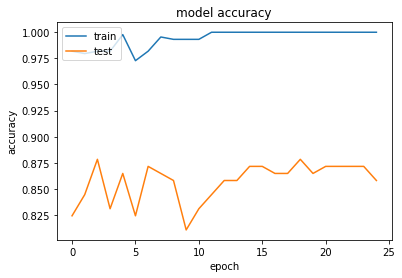

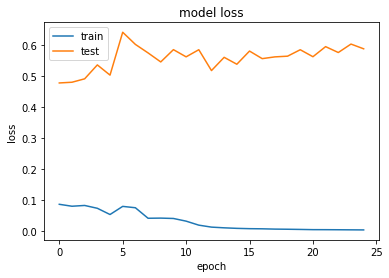

In [120]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_02       0.92      0.94      0.93        35
      GMB_05       0.76      0.85      0.80        33
      GMB_06       0.93      0.86      0.89        29
      GMB_07       0.80      0.84      0.82        19
      GMB_10       0.89      0.78      0.83        32

    accuracy                           0.86       148
   macro avg       0.86      0.86      0.86       148
weighted avg       0.86      0.86      0.86       148



In [122]:
model1.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [123]:
import cv2
import matplotlib.pyplot as plt
image1='daun_azar.jpg'

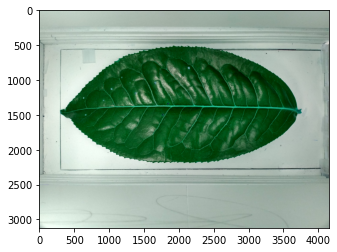

In [124]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [127]:
image_testing = Image.open('daun_azar.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [128]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [129]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.9692998e-13 1.8798649e-09 9.3010286e-08 9.9999988e-01 6.1773503e-13]]
['GMB_07']
